# DBSCAN
- 밀도 기반 군집화 알고리즘
- 밀도가 낮으면 노이즈 처리

## 주요 매개변수
- eps: 두 데이터 포인트가 같은 군집에 속하기 위해 가지는 최대거리
- min_samples: 한 군집을 형성하기 위해 필요한 최소 데이터 포인 수

## 작동 원리
1. 임의의 데이터 포인트를 선택
2. 선택한 데이터 포인트의 eps 반경 내에 있는 모든 데이터 포인트를 찾기
3. eps 반경 내의 데이터수 ≥ min_samples : 해당 데이터 포인트를 중심으로 새로운 군집 형성.
4. eps 반경 내의 데이터수 < min_samples : 해당 데이터 포인트를 노이즈로 간주
5. 군집에 속한 데이터 포인트에 대해 2~4 단계를 반복합니다.
6. 모든 데이터 포인트가 처리될 때까지 이 과정을 반복합니다.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

# 데이터셋 불러오기
df = pd.read_csv('Mall_Customers.csv')


# 데이터 확인
print(df.head())

# 필요한 열만 선택
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# 데이터 정규화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


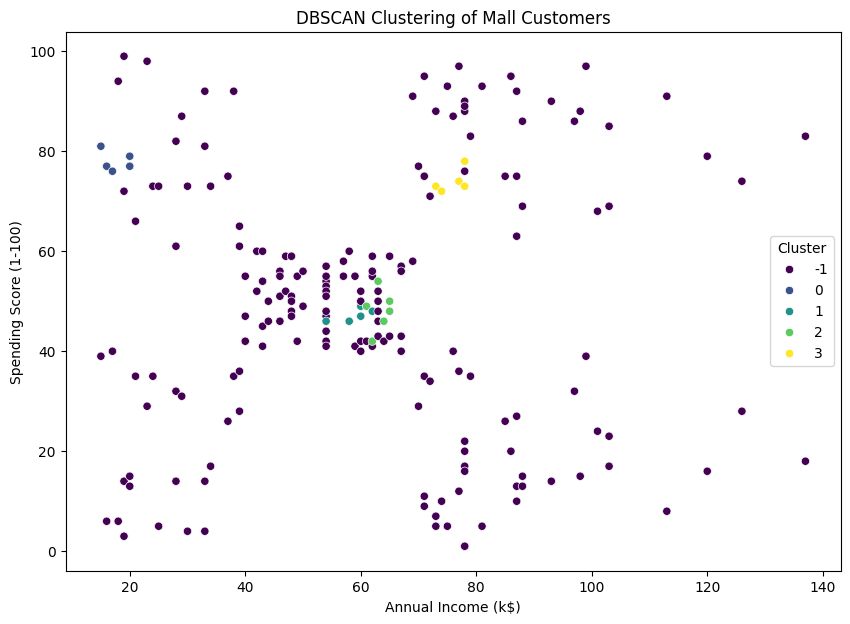

In [2]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

# DBSCAN 모델 생성
dbscan = DBSCAN(eps=5, min_samples=5)

# 모델 학습 및 예측
# df['Cluster']는 각 데이터에 대해 군집 라벨을 예측하고 df데이터 프레임의 새로운 열에 저장한다.
df['Cluster'] = dbscan.fit_predict(X)

# 군집화 결과 시각화
plt.figure(figsize=(10, 7))
# hue는 Cluster 열을 hue에 지정함으로써 각 군집이 서로 다른 색상으로 구분한다.
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='viridis')
plt.title('DBSCAN Clustering of Mall Customers')
plt.show()

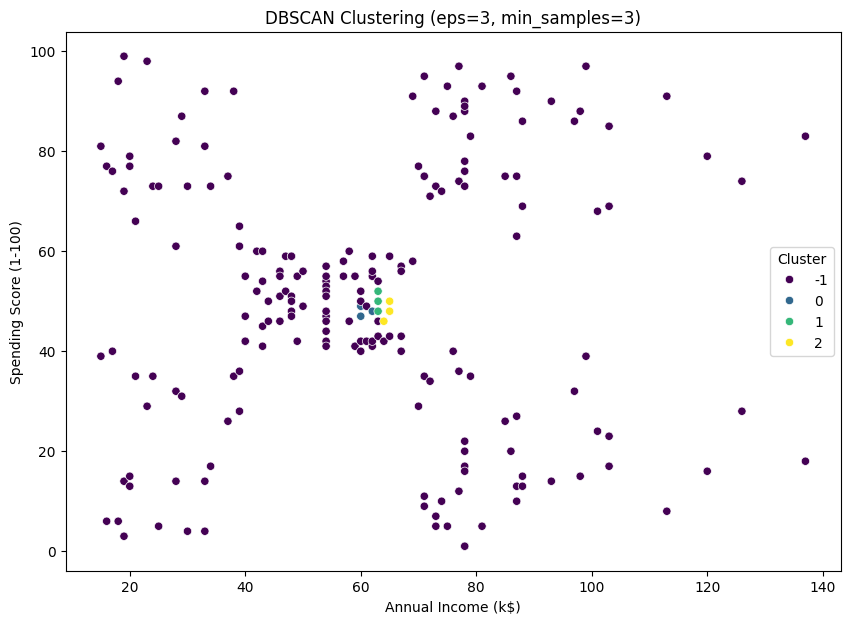

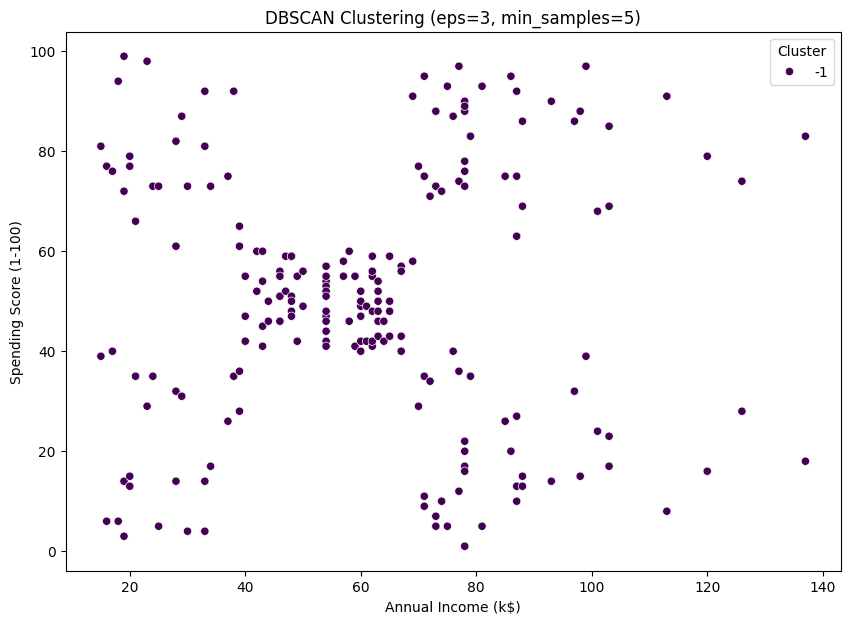

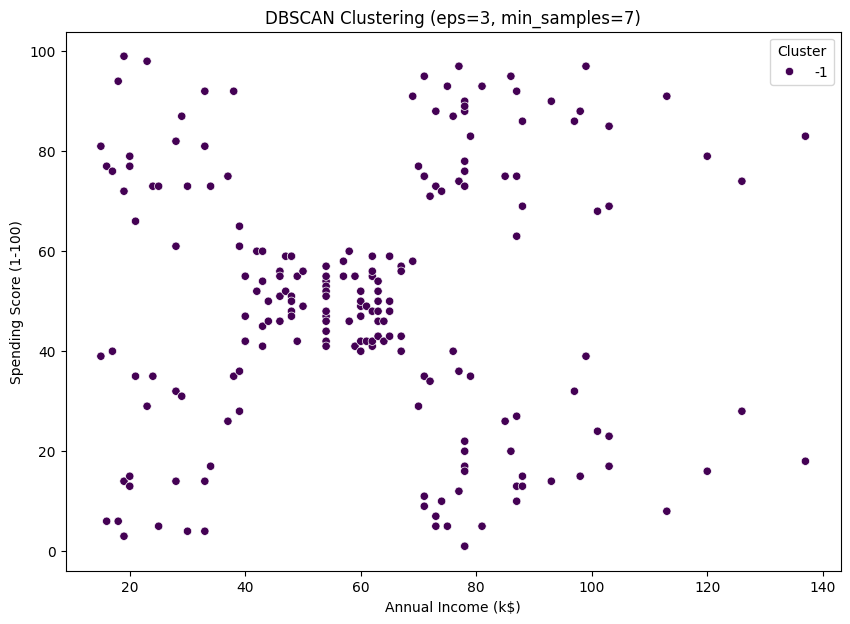

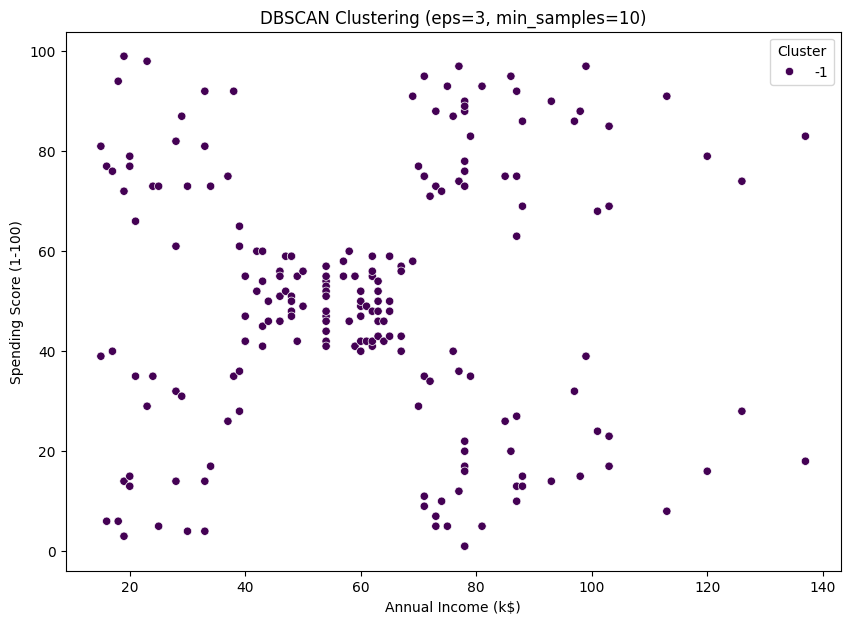

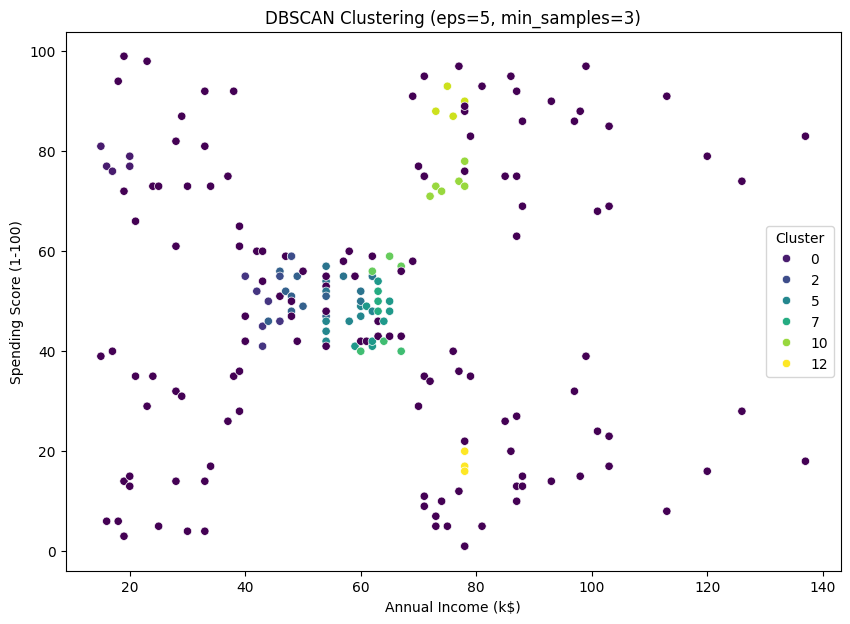

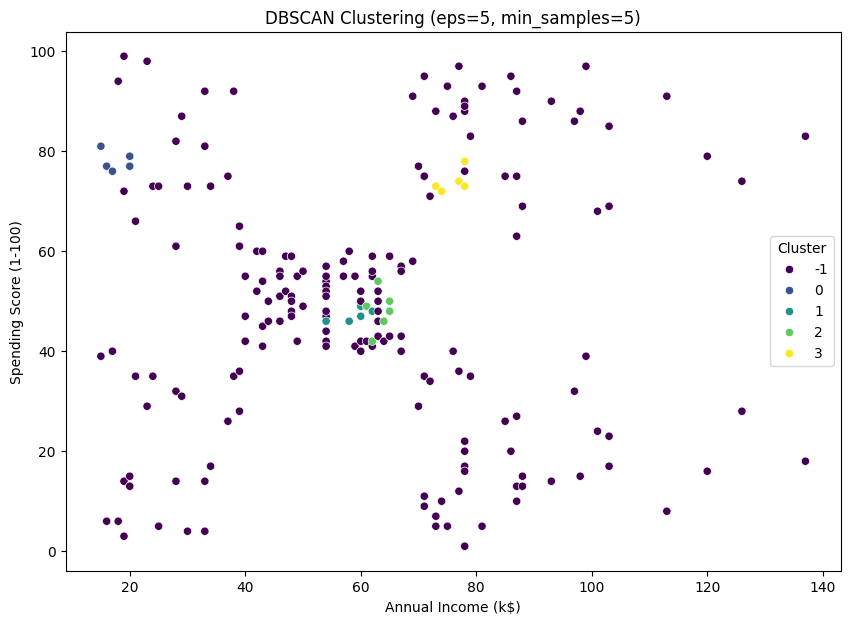

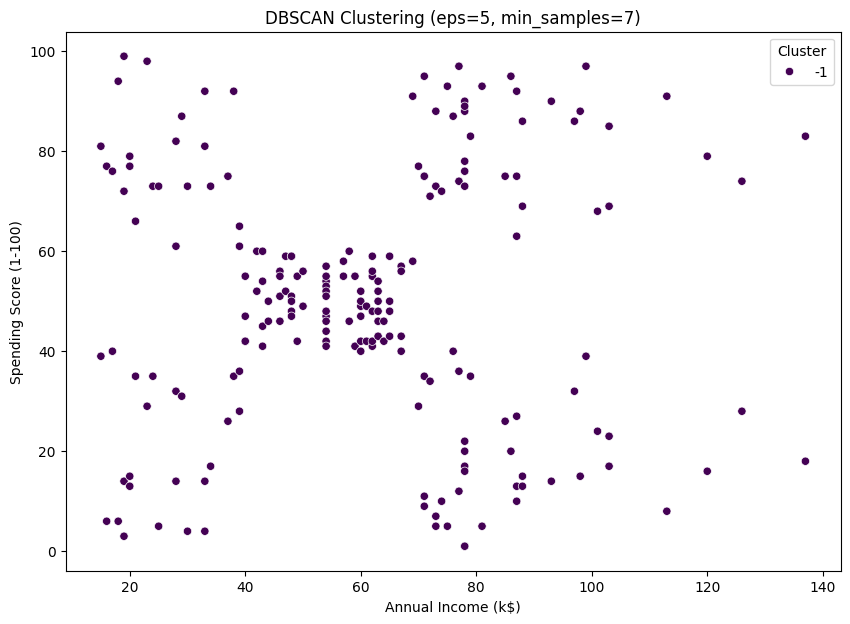

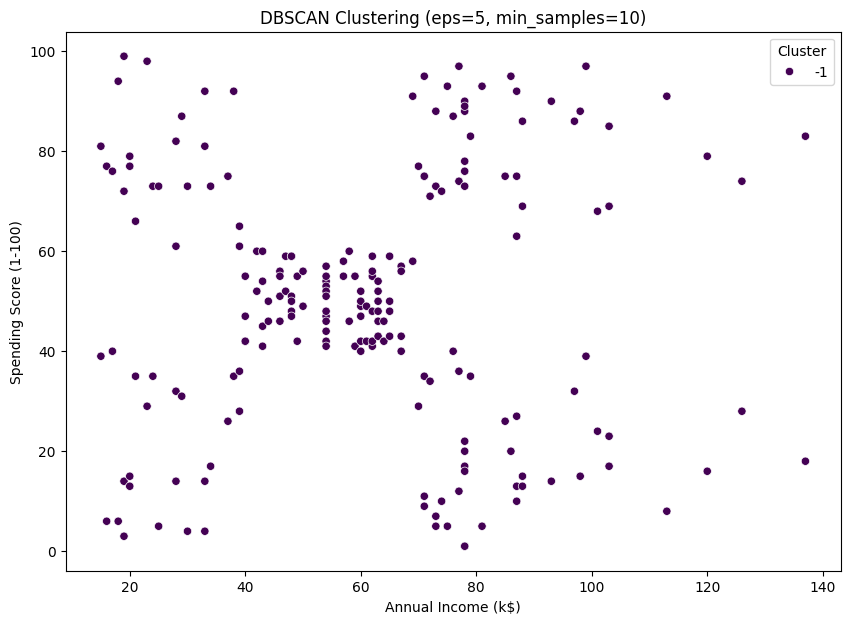

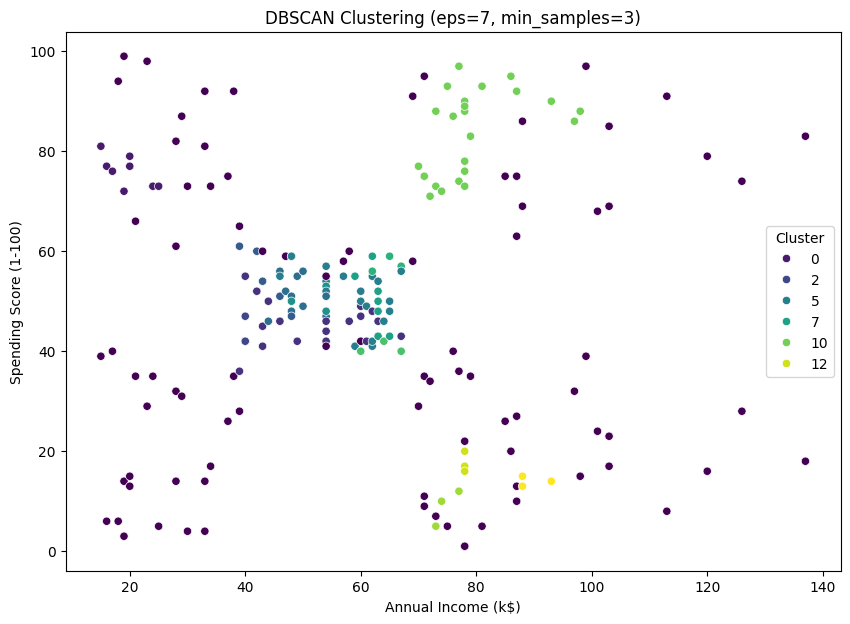

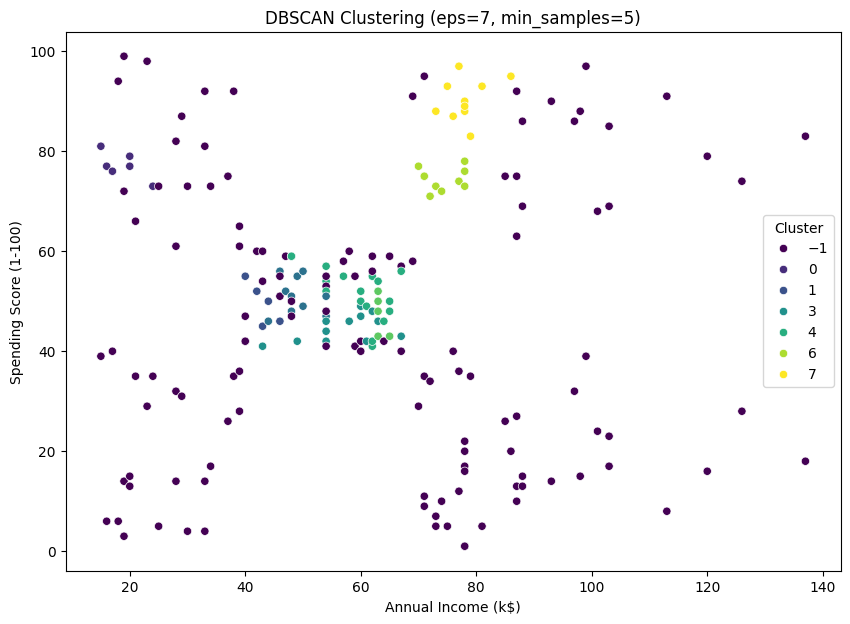

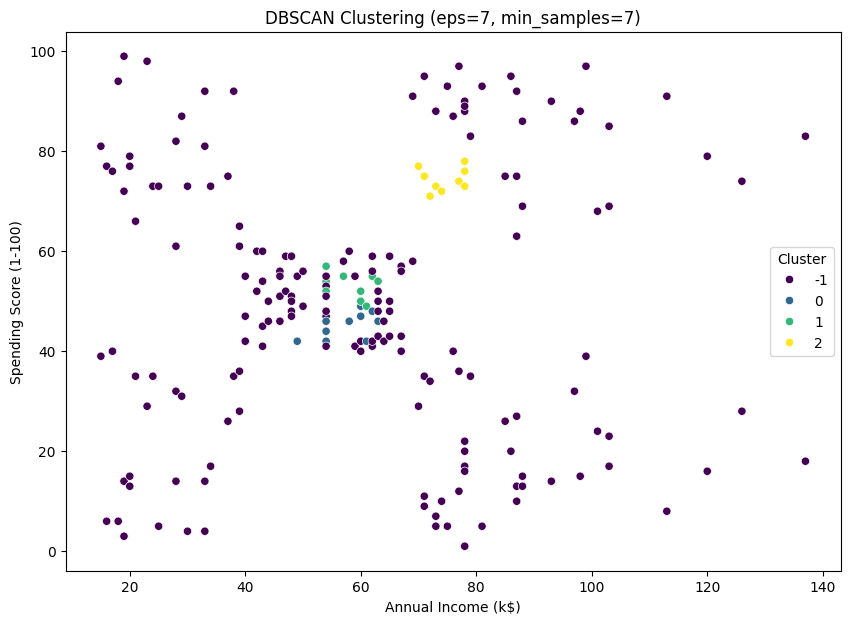

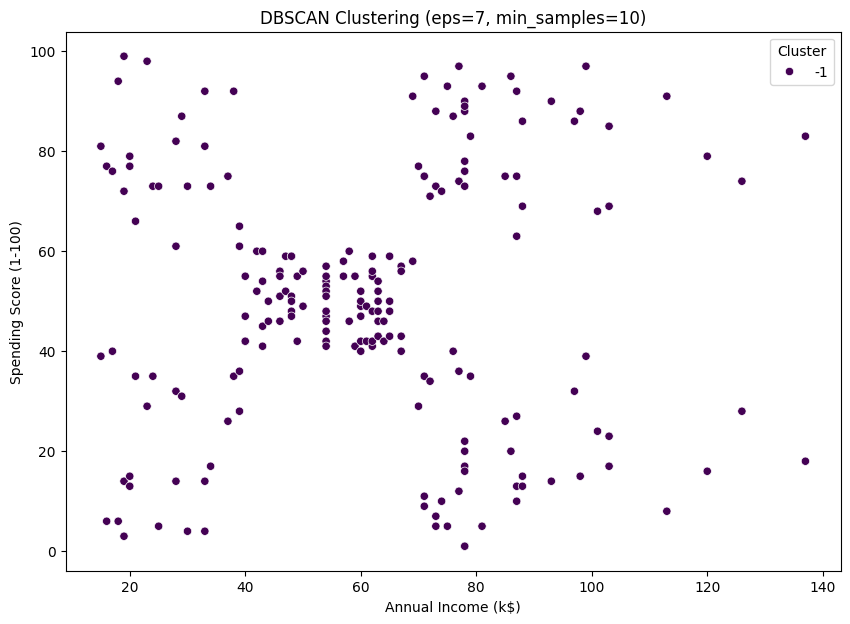

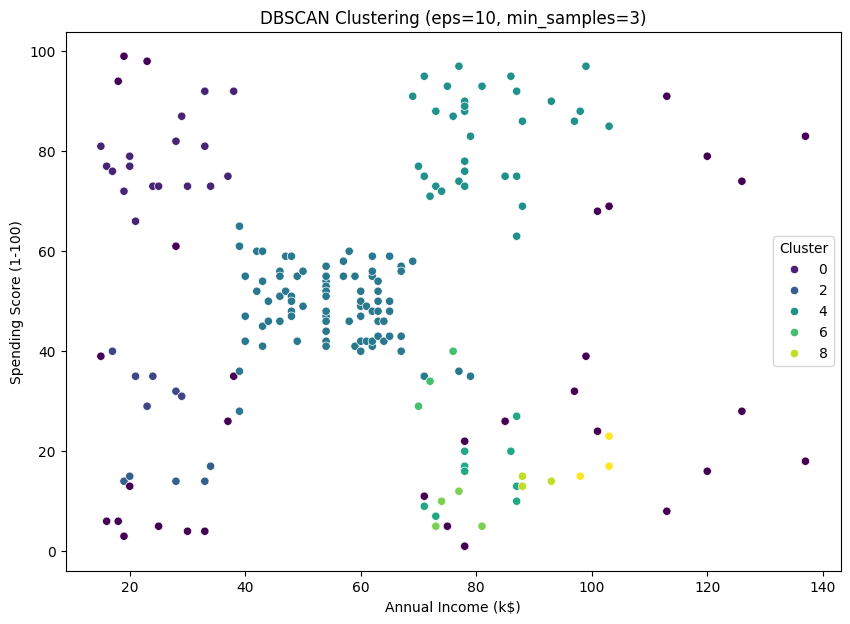

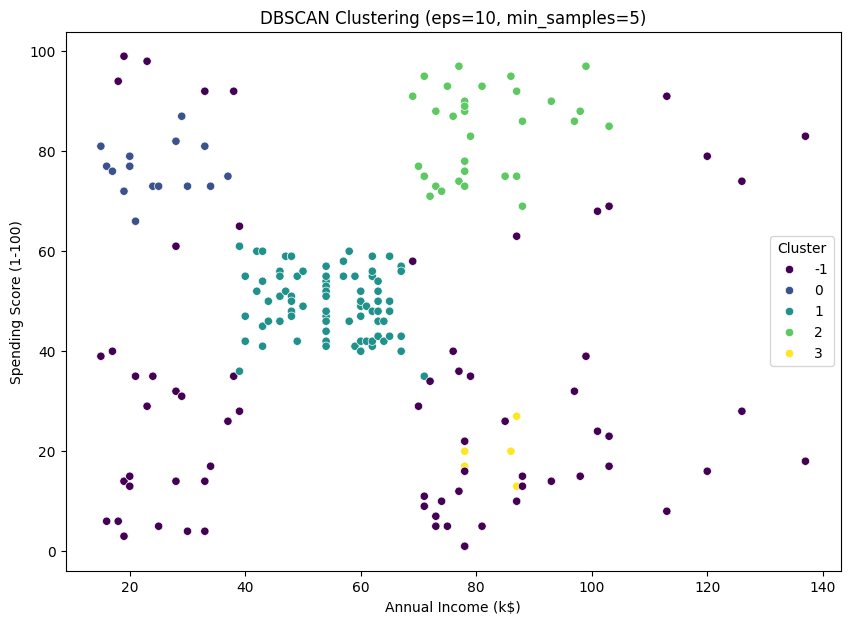

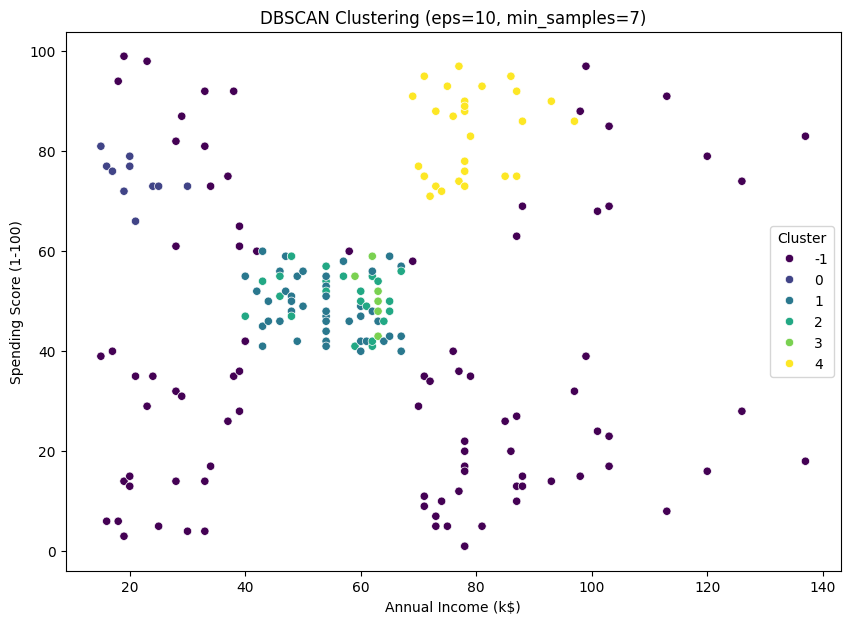

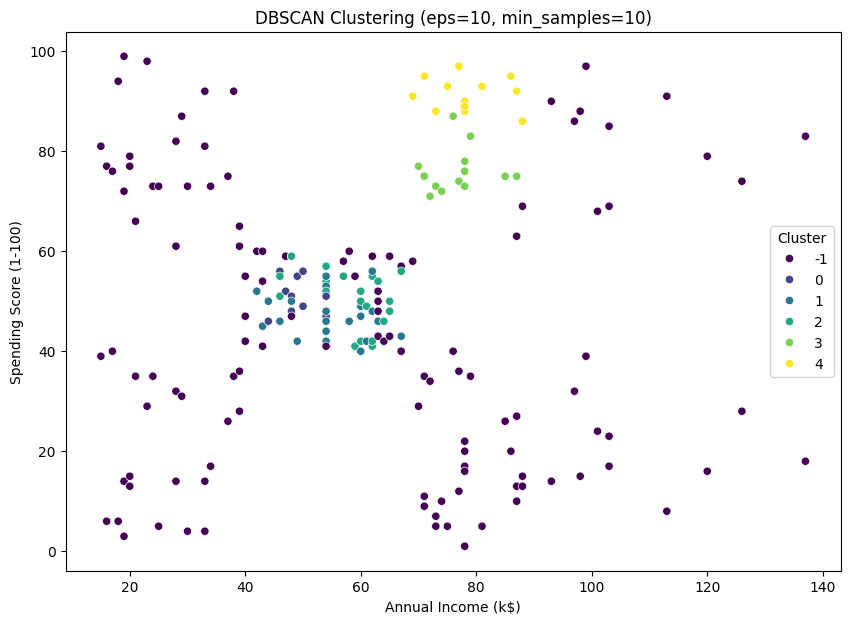

In [3]:
# 다양한 eps와 min_samples 값 시도
eps_values = [3, 5, 7, 10]
min_samples_values = [3, 5, 7, 10]

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        df['Cluster'] = dbscan.fit_predict(X)
        
        plt.figure(figsize=(10, 7))
        sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='viridis')
        plt.title(f'DBSCAN Clustering (eps={eps}, min_samples={min_samples})')
        plt.show()